In [1]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [8]:
data = []
for line in open("iris.data","r"):
  try:
    items = line.strip().split(",")
    
    data.append(([float(i) for i in items[:4]], items[4]))
  except:
    pass

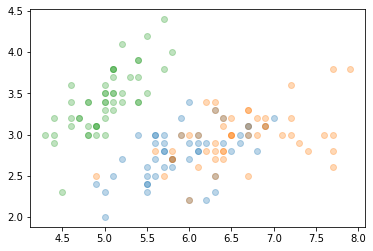

In [3]:
classes = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa' ]

for c in classes:
  X0 = []
  X1 = []
  for d in data:
    if d[1] == c:
      X0.append(d[0][0])
      X1.append(d[0][1])
  plt.scatter(X0, X1, alpha = 0.3)

plt.show()

In [4]:
random.shuffle(data)

train = data[:-30]
test = data[-30:]

In [5]:
def distance(a,b):
  return sum((bi-ai)**2 for ai, bi in zip(a,b)) ** 0.5


In [6]:
from collections import Counter

def knn(query, k, train):
  #train 데이터 중에서 query랑 가장 가까운 k개 찾기
  dist_cls = []

  for v, c in train:
    d = distance(query, v)
    dist_cls.append((d,c))

  dist_cls.sort()
  dist_cls = dist_cls[:k]

  #가중치를 준다면?
  cls_cnt = {}
  for d, c in dist_cls:
    if c not in cls_cnt:
      cls_cnt[c] = 0
    cls_cnt[c] += 1/(1+d)
  
  return max(cls_cnt.items(), key=lambda cc: cc[1])[0]

  #찾은 것 중에서, 가장 많이 나온 class를 선택해서 return 하기
  # cls_cnt = Counter([c for d,c in dist_cls])
  # return cls_cnt.most_common(1)[0][0]


100%|██████████| 30/30 [00:24<00:00,  1.23it/s]


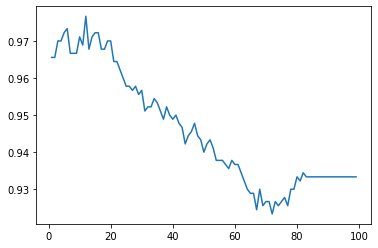

In [7]:
n_trials = 30

acc_avg = [0] * 100

for _ in tqdm(range(n_trials)):
  
  random.shuffle(data)
  train = data[:-30]
  test = data[-30:]

  for k in range(1, 100):
    
    correct_cnt = 0
    for t_vec, t_cls in test:
      expected = knn(t_vec, k, train)
      if expected == t_cls:
        correct_cnt +=1
    accuracy = correct_cnt / len(test)
    acc_avg[k] += accuracy

acc_avg = [a/n_trials for a in acc_avg]
acc_avg = acc_avg[1:]
X = range(1,100)

plt.plot(X,acc_avg)
plt.show()